# Dataset
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
## Some explanation

In [171]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/dataset.csv')
print(df.columns,len(df.columns))
print(df.head())


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object') 35
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Devel

# Preprocessing
## Dropping columns 
The original dataset has been reduced of 21 columns, most of them brought redundant or useless data for our goals. Moreover some features had empty valuse for some employees. The number of columns in the cleaned dataset is 15

In [172]:

df2 = df.drop(['EducationField','EmployeeCount','EmployeeNumber','StockOptionLevel','YearsWithCurrManager','TrainingTimesLastYear',
            'HourlyRate','DailyRate','PercentSalaryHike','YearsAtCompany','MonthlyRate','StandardHours',
            'NumCompaniesWorked','Over18','YearsSinceLastPromotion','StandardHours','JobInvolvement','JobRole','RelationshipSatisfaction',
            'Department','YearsInCurrentRole','EnvironmentSatisfaction'], axis= 1)
print(df2.columns,len(df2.columns))




Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'Gender', 'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'PerformanceRating', 'TotalWorkingYears',
       'WorkLifeBalance'],
      dtype='object') 14


## Discretization


array([[<AxesSubplot: title={'center': 'Age'}>]], dtype=object)

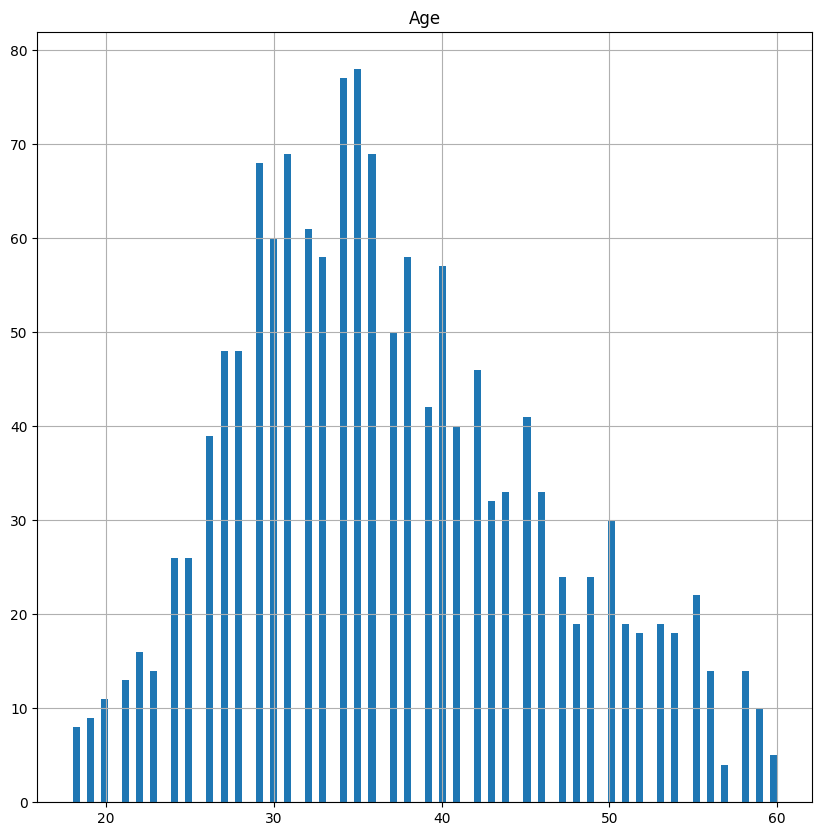

In [173]:
df.hist("Age", bins=100, figsize=(10,10))

In [174]:
def discretize_age(x):
    if x < 30:
        return 'Young'
    if x < 40:
        return 'Middle-age'
    return 'Senior'

df2['Age'] = df['Age'].apply(lambda x: discretize_age(x))
print("New values for age:")
print(np.unique(df2["Age"], return_counts=True)[0])
print(np.unique(df2["Age"], return_counts=True)[1])

New values for age:
['Middle-age' 'Senior' 'Young']
[622 522 326]


array([[<AxesSubplot: title={'center': 'DistanceFromHome'}>]],
      dtype=object)

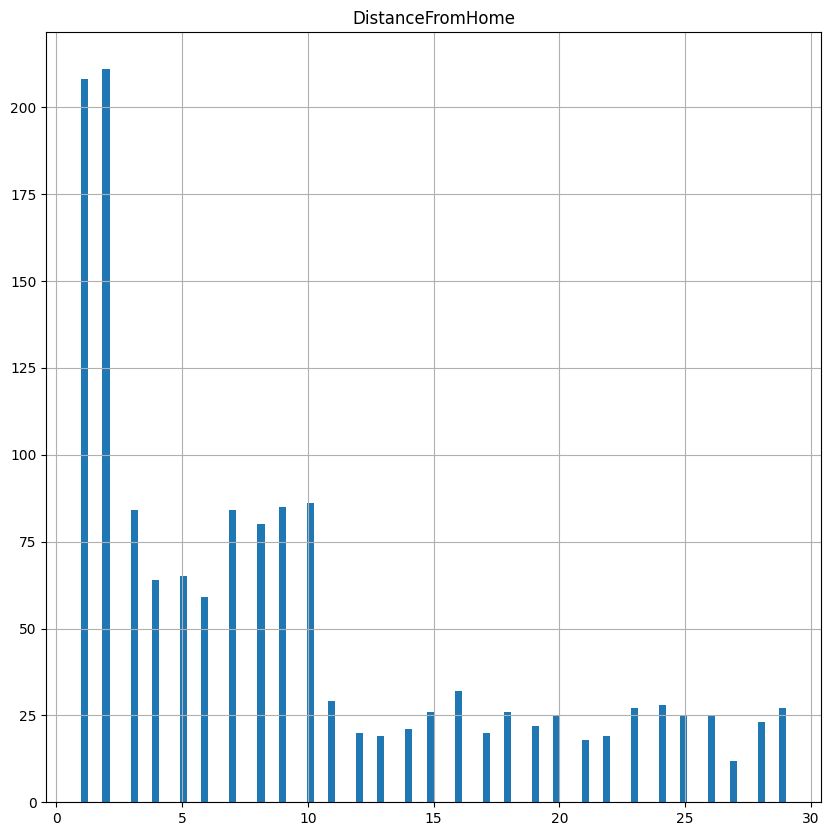

In [175]:
df.hist("DistanceFromHome", bins=100, figsize=(10,10))

In [176]:
def discretize_distance(x):
    if x < 10:
        return 'Short'
    if x < 20:
        return 'Medium'
    return 'Long'
    

df2['DistanceFromHome'] = df['DistanceFromHome'].apply(lambda x: discretize_distance(x))
print("New values for DistanceFromHome:")
print(np.unique(df2["DistanceFromHome"], return_counts=True)[0])
print(np.unique(df2["DistanceFromHome"], return_counts=True)[1])

New values for DistanceFromHome:
['Long' 'Medium' 'Short']
[229 301 940]


array([[<AxesSubplot: title={'center': 'TotalWorkingYears'}>]],
      dtype=object)

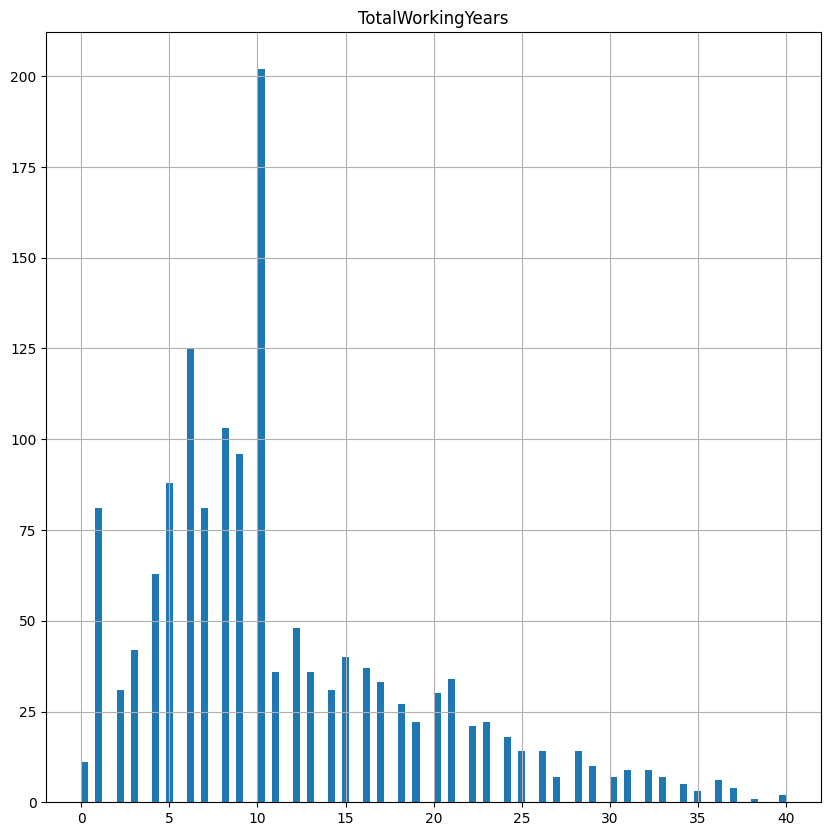

In [177]:
df.hist("TotalWorkingYears", bins=100, figsize=(10,10))

In [178]:
def discretize_experience(x):
    if x < 3:
        return 'Novice'
    if x < 7:
        return 'Beginner'
    if x < 15:
        return 'Competent'
    if x < 20:
        return 'Proficient'
    return 'Expert'
    

df2['TotalWorkingYears'] = df['TotalWorkingYears'].apply(lambda x: discretize_experience(x))
print("New values for DistanceFromHome:")
print(np.unique(df2["TotalWorkingYears"], return_counts=True)[0])
print(np.unique(df2["TotalWorkingYears"], return_counts=True)[1])

New values for DistanceFromHome:
['Beginner' 'Competent' 'Expert' 'Novice' 'Proficient']
[318 633 237 123 159]


funzione di discretizzazione basato sul quantile

array([[<AxesSubplot: title={'center': 'MonthlyIncome'}>]], dtype=object)

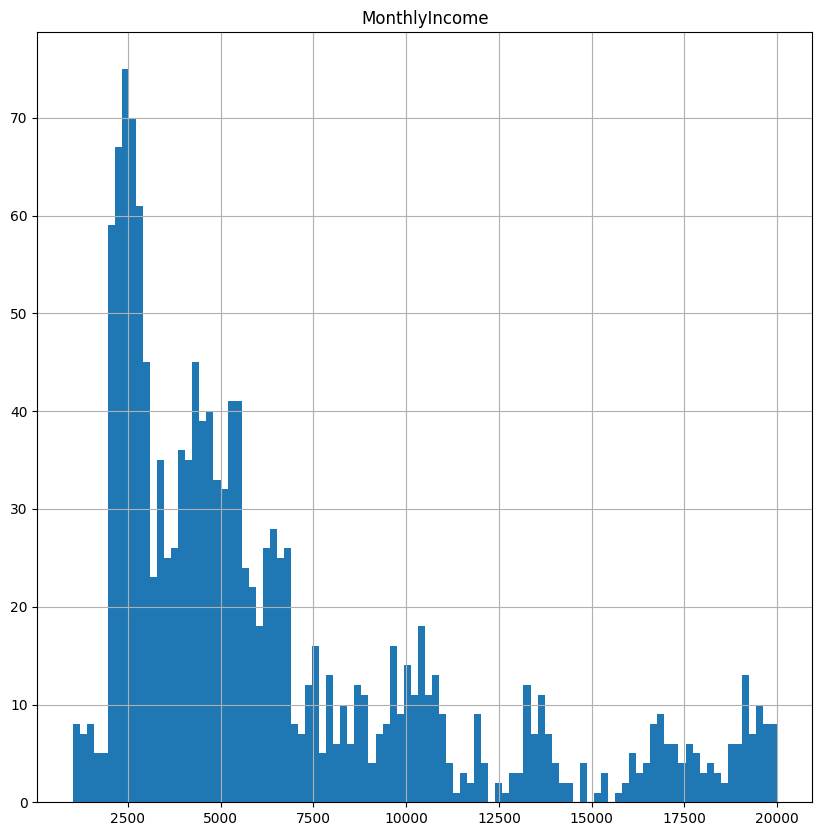

In [179]:
df.hist("MonthlyIncome", bins=100, figsize=(10,10))

In [180]:
df2["MonthlyIncome"] =  pd.qcut(df['MonthlyIncome'], 3, labels=["Lower", "On_average", "Higher"])
print("New unique values for Total_income:")
print(np.unique(df2["MonthlyIncome"], return_counts=True)[0])
print(np.unique(df2["MonthlyIncome"], return_counts=True)[1])

New unique values for Total_income:
['Higher' 'Lower' 'On_average']
[490 490 490]


# Mapping
In the following columns the values in the range {1..4} have been mapped into string values already given by the specification of the dataset, whereas for the columns 'JobLevel' the corresponding values have been mapped by us trying out to be the as more general as possibile. The colum  'Business travel' has been just renamed.

In [181]:
map_ed =  {1: 'Below_college',2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
map_sat = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very_high'}
map_rat = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
map_life = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
level = {1: 'Technician', 2: 'Rappresentative', 3: 'Director', 4: 'Manager', 5: 'Manager'}
travel  = {'Non-Travel': 'Non-Travel', 'Travel_Frequently':'Frequently', 'Travel_Rarely':'Rarely'}

def mapping(x,map):
    if x in map.keys():
        return map[x]
    raise Exception

df2['Education'] = df['Education'].apply(lambda x: mapping(x,map_ed))
df2['JobSatisfaction'] = df['JobSatisfaction'].apply(lambda x: mapping(x,map_sat))
df2['PerformanceRating'] = df['PerformanceRating'].apply(lambda x: mapping(x,map_rat))
df2['WorkLifeBalance'] = df['WorkLifeBalance'].apply(lambda x: mapping(x,map_life))
df2["Gender"] = df["Gender"].apply(lambda x: "M" if x else "F")
df2['JobLevel'] = df['JobLevel'].apply(lambda x: mapping(x,level))
df2['BusinessTravel'] = df['BusinessTravel'].apply(lambda x: mapping(x,travel))

In [182]:
print('None value : ',df2.isnull().sum().sum()) 

None value :  0


In [183]:
df2.to_csv('data/cleaning_dataset.csv', index=False)